In [21]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 그래프 마이너스 폰트 깨지는 문제 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [20]:
import sklearn.datasets
import mglearn

# 분류기의 불확실성 추정 (이진분류)
2개 함수 있음 (대부분의 분류 클래스는 적어도 1개 or 2개 모두 제공함)
- decision_function
- predict_proba

In [2]:
# 그레이디언이트 부스팅 분류기로 test
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 클래스 이름 'blue','red'로 변경 (예시를 위해)
y_named = np.array(['blue','red'])[y]

# 여러개의 배열을 한꺼번에 train_test_split에 넣을 수 있음
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# 그레이디언트 부스팅 모델 생성
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

## 결정 함수 (decision_function)
- 이진 분류에서 decision_function 반환 값의 크기는 (n_samples,)이며, **각 샘플이 하나의 실수 값을 반환함**
- 이 값은 모델이 데이터 포인트가 양성 클래스인 클래스 1에 속한다고 믿는 정도를 나타냄
    - 양수 값은 양성 클래스를 의미
    - 음수 값은 음성 (다른) 클래스 의미
- 값의 범위는 데이터와 모델 파라미터에 따라 달라짐

In [3]:
print('X_test.shape:', X_test.shape)
print('결정 함수 결과 형태:', gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [8]:
print('결정함수:\n', gbrt.decision_function(X_test))

결정함수:
 [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081
 -7.69097179  4.11001686  1.10753937  3.40782222 -6.46255955  4.28986642
  3.90156346 -1.20031247  3.66166081 -4.17231157 -1.23010079 -3.91576223
  4.03602783  4.11001686  4.11001686  0.65709014  2.69826265 -2.65673274
 -1.86776596]


- 결정 함수의 부호만 보고도 예측 결과 즉, 클래스를 알 수 있음

In [9]:
print('임계치와 결정 함수 결과 비교:\n', gbrt.decision_function(X_test) > 0)  # 0보다 크면 True
print('예측:\n', gbrt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


- 양수=True='red', 음수=False='blue'

In [11]:
gbrt.classes_

array(['blue', 'red'], dtype='<U4')

- 이진 분류에서 음성 클래스는 항상 classes_ 속성의 첫 번째 원소, 양성 클래스는 classes_의 두 번째 원소

In [13]:
# 불리언 값(True, False)을 0과 1로 변환
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

# classes_에 index로 사용
pred = gbrt.classes_[greater_zero]

# pred와 gbrt.predict의 결과 비교
print('pred는 예측 결과와 같다: ', np.all(pred==gbrt.predict(X_test)))

pred는 예측 결과와 같다:  True


In [14]:
# decision_function 값의 범위는 데이터와 모델 파라미터에 따라 달라짐
decision_function = gbrt.decision_function(X_test)
print('결정 함수 최솟값: {:.2f}, 최댓값: {:.2f}'.format(np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값: -7.69, 최댓값: 4.29


- 출력 범위가 임의의 값이라 이해 어렵

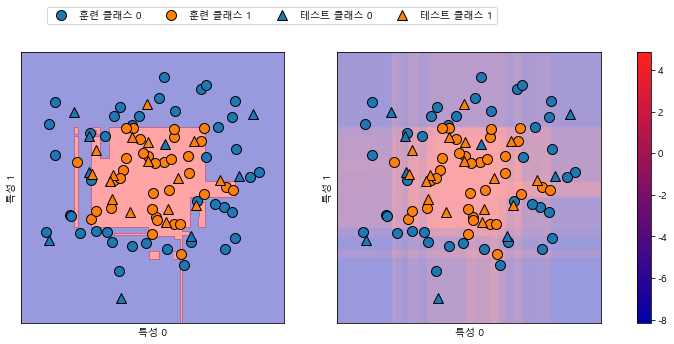

In [31]:
# 2차원 평명의 모든 점에 대해 decision_function의 값을 색상 정도로 표현 + 결정 경계    함께 시각화
fig, axes = plt.subplots(1, 2, figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['훈련 클래스 0','훈련 클래스 1','테스트 클래스 0','테스트 클래스 1'], ncol=4, loc=(.1, 1.1))

- 결정 경계 (좌), 결정 함수(우)
- 예측 결과뿐만 아니라, 분류기가 얼마나 확신을 하는지 알 수 있다
- 하지만, 결정 함수 그래프에서 두 클래스 사이의 경계를 구분하기는 어려움

## 예측 확률(predict_ proba)
- predict_proba의 출력은 각 클래스에 대한 확률이고, decision_function 출력보다 이해하기 쉬움
- 값의 크기는 이진 분류에서는 항상 (n_samples, 2)
    - 각 행의 첫 번째 원소는 첫 번째 클래스의 예측확률, 두 번째 원소는 두 번째 클래스의 예측확률
- 확률이기 때문에 출력은 항상 0 ~ 1 사이값을 가지며, 두 클래스 확률의 합은 항상 1

In [27]:
print('확률 값의 형태: ', gbrt.predict_proba(X_test).shape)

확률 값의 형태:  (25, 2)


In [30]:
print('예측 확률:\n', gbrt.predict_proba(X_test[:6]))  # 일부 6개만 확인

예측 확률:
 [[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


- 두 클래스 확률 합은 1이므로 두 클래스 중 하나는 50% 이상의 확률을 가질 것 -> 해당 클래스가 예측값이 됨

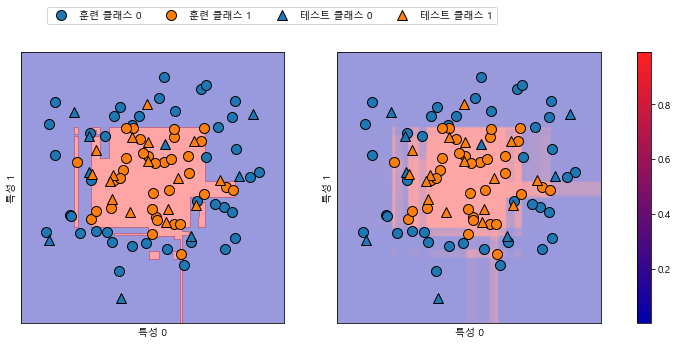

In [32]:
# 결정 경계와 클래스 1의 확률 시각화
fig, axes = plt.subplots(1, 2, figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # train point, test point 그리기
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
# colorbar 나타내기
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['훈련 클래스 0','훈련 클래스 1','테스트 클래스 0','테스트 클래스 1'], ncol=4, loc=(.1, 1.1))

- 예측 확률이 결정 함수때 보다 비교적 잘 나타나있으며, 불확실성이 있는 작은 영역들도 잘 확인할 수 있음

# 다중 분류에서 불확실성
- decision_function, predict_proba 메서드는 다중 분류에도 사용 가능

## 결정 함수(decision_function)
- 다중 분류에서 decision_function의 결과값 크기는 (n_samples, n_classes)
- 각 열은 각 클래스에 대한 확신 점수를 담고 있음
    - 수치가 크면 그 클래스일 가능성이 큼
    - 각 데이터 포인트 마다 점수들 중 가장 큰 값에 해당하는 클래스를 예측 값으로 사용

In [34]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print('결정 함수의 결과 형태:', gbrt.decision_function(X_test).shape)
print('결정 함수 결과:\n', gbrt.decision_function(X_test))

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
 [[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99677434 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99677434 -1.87637861  0.07863156]
 [ 0.06146394 -1.90755736 -1.92793758]
 [ 0.06146394 -1.90755736 -1.92793758]
 [ 0.06146394 -1.90755736 -1.92793758]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99087515 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99087515 -1.87637861  0.09686725]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99730159 -1.86429671  0.04166049]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99087515 -1.87637861  0.09686725]
 [-1.99087515 -1.87637861  0.07

In [35]:
# 각 데이터 포인트별 가장 큰 값을 가진 class
print('가장 큰 결정 함수의 인덱스:\n', np.argmax(gbrt.decision_function(X_test), axis=1))   # argmax 함수를 적용해 예측 재현
print('예측:\n', gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


## 예측 확률(predict_proba)
- predict_proba의 출력값 크기는 (n_samples, n_classes)로 앞서 본 것과 같음
- 각 데이터 포인트에서 클래스 확률들의 합은 1

In [37]:
print('예측 확률:\n', gbrt.predict_proba(X_test)[:6]) # 일부만 확인

예측 확률:
 [[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]


In [38]:
# 행 방향으로 확률을 더하면 1이됨
print('합:', gbrt.predict_proba(X_test)[:6].sum(axis=1)) # 일부만 

합: [1. 1. 1. 1. 1. 1.]


In [39]:
# predict_proba결과에 argmax함수를 적용해, 예측 재현 가능  # 각 행에서 가장 큰 값 도출함
print('가장 큰 예측 확률의 index:\n', np.argmax(gbrt.predict_proba(X_test), axis=1))
print('예측:\n', gbrt.predict(X_test))

가장 큰 예측 확률의 index:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [44]:
# argmax함수 사용시, 분류기의 classes_ 속성을 사용해 클래스의 실제 이름값을 얻어 사용해서 비교해야 혼선 방지!
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# iris data set의 taget class 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)

print('훈련 데이터에 있는 클래스 종류:', logreg.classes_)
print('예측:', logreg.predict(X_test)[:10])

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print('가장 큰 결정 함수의 인덱스:', argmax_dex_func[:10])
print('인덱스를 classes_에 연결', logreg.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_에 연결 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
